

- [Jacques J. F. Commandeur and Siem Jan Koopman, An Introduction to State Space Time Series Analysis (Practical Econometrics) ](https://www.amazon.co.jp/dp/0199228876/ref=cm_sw_r_tw_dp_897A7MBN34NXEFDWYPHF?_encoding=UTF8&psc=1)
    - Data: http://www.ssfpack.com/CKbook.html
    - Japanese Translation: [状態空間時系列分析入門   J.J.F. コマンダー ](https://www.amazon.co.jp/dp/4916092929/ref=cm_sw_r_tw_dp_ENXRFY89QBMRWFVPDVMG )

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2, f as fdist

import matplotlib.pyplot as plt
%matplotlib inline

## Data

### UK drivers KSI

In [2]:
df_ukdrivers = pd.read_csv('../data/ckbook/UKdriversKSI.txt', skiprows=[0], header=None)
df_ukdrivers.columns = ['drivers']
df_ukdrivers['log_drivers'] = np.log(df_ukdrivers['drivers'])
df_ukdrivers['index'] = df_ukdrivers.index + 1
df_ukdrivers.index = pd.date_range(start='1969-01', periods=df_ukdrivers.shape[0], freq='M')
df_ukdrivers.head()

,drivers,log_drivers,index
1969-01-31,1687,7.430707,1
1969-02-28,1508,7.318540,2
1969-03-31,1507,7.317876,3
1969-04-30,1385,7.233455,4
1969-05-31,1632,7.397562,5


<AxesSubplot:xlabel='time (month)', ylabel='$\\log$ KSI'>

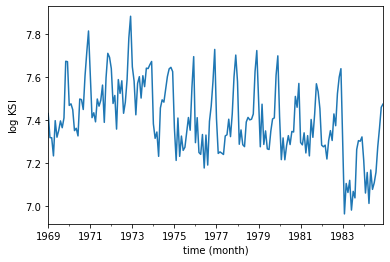

In [3]:
df_ukdrivers['log_drivers'].plot(xlabel='time (month)', ylabel='$\log$ KSI')

### Fatalties in Norway and Finland

In [4]:
df_fatalties = pd.read_table('../data/ckbook/NorwayFinland.txt', skiprows=[0], header=None)
df_fatalties.columns = ['year', 'Norwegian_fatalities', 'Finnish_fatalities']
df_fatalties.index = pd.date_range(start='1970', periods=df_fatalties.shape[0], freq='y')
df_fatalties['log_Norwegian_fatalties'] = np.log(df_fatalties['Norwegian_fatalities'])
df_fatalties['log_Finnish_fatalties'] = np.log(df_fatalties['Finnish_fatalities'])
df_fatalties.head()

,year,Norwegian_fatalities,Finnish_fatalities,log_Norwegian_fatalties,log_Finnish_fatalties
1970-12-31,1970,560,1055,6.327937,6.961296
1971-12-31,1971,533,1143,6.278521,7.041412
1972-12-31,1972,490,1156,6.194405,7.052721
1973-12-31,1973,511,1086,6.236370,6.990257
1974-12-31,1974,509,865,6.232448,6.762730


<AxesSubplot:>

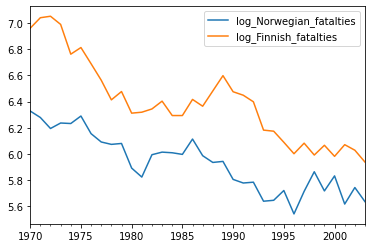

In [5]:
df_fatalties.plot(y=['log_Norwegian_fatalties', 'log_Finnish_fatalties'])

# Chapter 1: Introduction

- Linear regression for UK drivers killed or seriously injured (KSI)

In [6]:
exog = sm.add_constant(df_ukdrivers['index'], prepend=False)
ols_model = sm.OLS(df_ukdrivers['log_drivers'], exog)

In [7]:
ols_result = ols_model.fit()

In [8]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_drivers   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     53.77
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           6.31e-12
Time:                        09:25:06   Log-Likelihood:                 90.714
No. Observations:                 192   AIC:                            -177.4
Df Residuals:                     190   BIC:                            -170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
index         -0.0014      0.000     -7.333      0.000      -0.002      -0.001
const          7.5458      0.022    343.387      0.000       7.502       7.589
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.682
Skew:                           0.325   Prob(JB):                       0.0962
Kurtosis:                       2.596   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

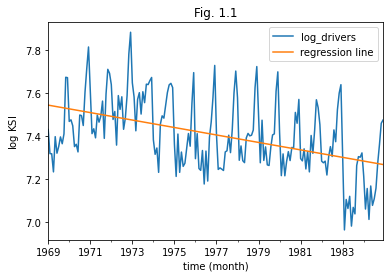

In [9]:
df_ukdrivers['log_drivers'].plot(xlabel='time (month)', ylabel='$\log$ KSI')
ax = ols_result.fittedvalues.plot(label='regression line')
ax.set_title('Fig. 1.1')
ax.legend()

Text(0.5, 1.0, 'Fig. 1.3')

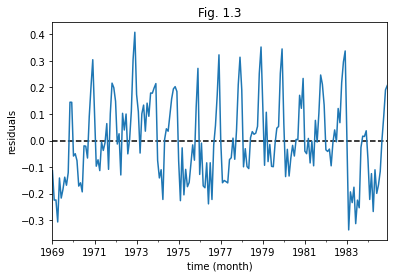

In [10]:
ax = ols_result.wresid.plot(xlabel='time (month)', ylabel='residuals')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 1.3')

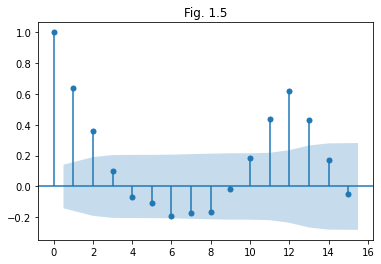

In [11]:
sm.tsa.graphics.plot_acf(ols_result.wresid, lags=15, title='Fig. 1.5');

# Chapter 2

As for the diagnostic tests, see also Chapter 8.

## Deterministic Level

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)
\end{aligned}
$$

In [12]:
dconstant_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='deterministic constant', use_exact_diffuse=True)

In [13]:
dconstant_results = dconstant_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.324974
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


In [14]:
dconstant_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                           
==================================================================================
Dep. Variable:                log_drivers   No. Observations:                  192
Model:             deterministic constant   Log Likelihood                  62.395
Date:                    Thu, 18 Feb 2021   AIC                           -120.790
Time:                            09:25:07   BIC                           -114.275
Sample:                        01-31-1969   HQIC                          -118.151
                             - 12-31-1984                                         
Covariance Type:                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0294      0.003      8.987      0.000       0.023       0.036
===================================================================================
Ljung-Box (L1) (Q):                  94.66   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.00   Prob(JB):                         0.69
Heteroskedasticity (H):               2.06   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

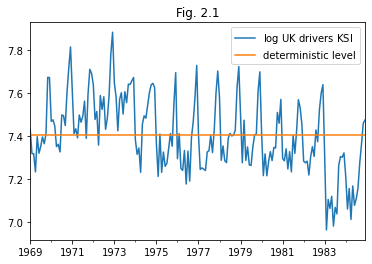

In [15]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconstant_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level')
ax.set_title('Fig. 2.1')
ax.legend()

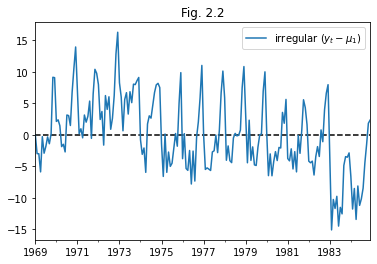

In [16]:
ax = pd.Series(dconstant_results.smoothing_error[0], index=df_ukdrivers.index).plot(label='irregular ($y_t - \\mu_1$)')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.2')
ax.legend()

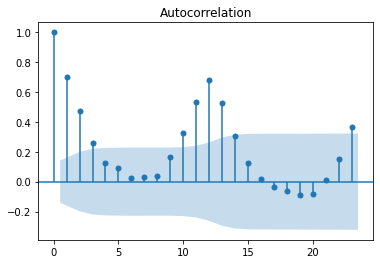

In [17]:
sm.tsa.graphics.plot_acf(dconstant_results.standardized_forecasts_error[0], alpha=0.05, fft=False);

**Diagnostic Tests**

Statistical tests based on standardized forcasts error $e_t$:

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
e_t = v_t / F_t,
\end{aligned}
$$

where

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
v_t &= y_t - Z E[\alpha_t|Y_{1:t}]\\
F_t &= {\rm Var}[v_t|Y_{1:t}]
\end{aligned}
$$

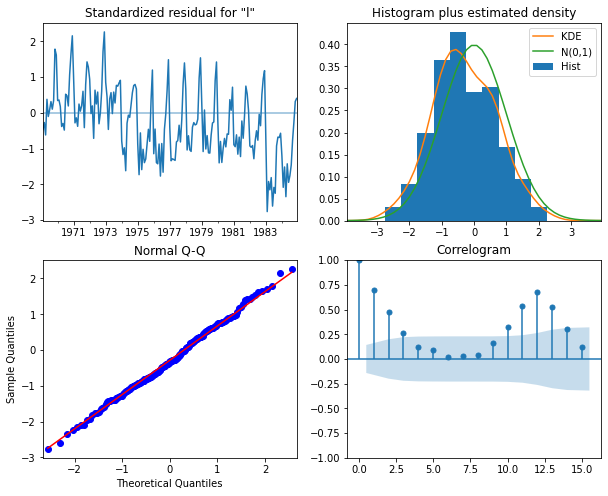

In [18]:
dconstant_results.plot_diagnostics(figsize=(10, 8), lags=15);

**Test 1. Independence**

- Box-Ljung statistics: $Q(k) \sim \chi^2(k - w +1)$
    - $w$ ... number of hyper parameters
- Autocorrelation: $r_k \sim N(0, 1/\sqrt{T})$

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
r_k &= \frac{\sum_{t=1}^{T-k}(e_t - \bar{e})(e_{t+k} - \bar{e})}{\sum_{t=1}^T (e_t - \bar{e})^2}\\
Q(k)&=T(T+2)\sum_{l=1}^{k}\frac{r_l^2}{T-l}
\end{aligned}
$$


In [19]:
# independence
print(f"Box-Ljung (95% threshold {chi2.ppf(0.95, df=15 - dconstant_results.df_model+1)}): ")
print("    ", dconstant_results.test_serial_correlation(method='ljungbox', lags=[15])[0, 0, 0])

acf_dconstant, acf_ci_dconstant = sm.tsa.acf(dconstant_results.standardized_forecasts_error[0], alpha=0.05, nlags=12, fft=False)

print(f"Autocorrelation (95% confidence interval = {acf_ci_dconstant[1] - acf_dconstant[1]})")
print("   lag=1: ", acf_dconstant[1])
print("   lag=12: ", acf_dconstant[12])

Box-Ljung (95% threshold 23.684791304840576): 
     415.2115627595994
Autocorrelation (95% confidence interval = [-0.14144822  0.14144822])
   lag=1:  0.697897803820078
   lag=12:  0.678006701734552


**Test 2. Heterokedasticity**

- $H(h)\sim F(h,h)$

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
H(h) &= \frac{\sum_{t=T-h+1}^{T}e_t^2}{\sum_{t=d+1}^{d+h} e_t^2}\\
\end{aligned}
$$


$h$: round($T$)  
$d$: number of diffusive initialization parameters

In [20]:
# Heteroskedasticity
d = np.maximum(dconstant_results.loglikelihood_burn, dconstant_results.nobs_diffuse)
# h = int(np.round((dconstant_results.nobs - dconstant_results.df_model) / 3))
h = int(np.round((dconstant_results.nobs - d) / 3))
print(f"Heterokedasticity (95% threshold = {fdist.ppf(1-0.025, h,h)}): ")
print(" ", dconstant_results.test_heteroskedasticity(method='breakvar')[0,0])

Heterokedasticity (95% threshold = 1.639485158828104): 
  2.057693846379324


**Test 3. Normality**

 - $N \sim \chi^2(2)$
 
$$
\begin{aligned}
\end{aligned}
\begin{aligned}
N &= T\left(\frac{S^2}{6} + \frac{(K-3)^2}{24}\right)\\
\end{aligned}
$$

where

 $$
\begin{aligned}
\end{aligned}
\begin{aligned}
S &= \frac{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^3}{\sqrt{\left\{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^2\right\}^3}}\\
K &= \frac{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^4}{\left\{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^2\right\}^2}\\
\end{aligned}
$$


In [21]:
# Normality (Jarque-Bera)
print(f"Normality (95% threshold = {chi2.ppf(0.95, 2)})")
print("", dconstant_results.test_normality(method='jarquebera')[0,0])

Normality (95% threshold = 5.991464547107979)
 0.7332511028465183


In [22]:
def diagnostic_tests(results, alpha=0.05, lag_boxljung=15, nlags=[1,12]):
    tests_results = []
    # Independence
    ## Box-Ljung
    boxljung_result = {'': 'Independence', 'Statistics': f'Box-Ljung: Q({lag_boxljung})'}
    boxljung_result['Value'] = results.test_serial_correlation(method='ljungbox', lags=[lag_boxljung])[0, 0, 0]
    boxljung_result['Threshold'] = chi2.ppf(1-alpha, df=lag_boxljung - results.nobs_diffuse+1)
    boxljung_result['Satisfy'] = boxljung_result['Value'] < boxljung_result['Threshold'] 
    tests_results.append(boxljung_result)
    
    ## autocorrelation
    acf, acf_ci = sm.tsa.acf(results.standardized_forecasts_error[0], alpha=alpha, nlags=max(nlags), fft=False)
    acf_threshold = acf_ci[1] - acf[1]
    for lag in nlags:
        acf_result = {'': 'Independence', 'Statistics': f'ACF(lag={lag}): r({lag})'}
        acf_result['Value'] = acf[lag]
        acf_result['Threshold'] = acf_threshold
        acf_result['Satisfy'] = (acf_result['Value'] >= acf_result['Threshold'][0]) & (acf_result['Value'] <= acf_result['Threshold'][1])
        tests_results.append(acf_result)
    
    # Heterokedasticity    
    d = np.maximum(results.loglikelihood_burn, results.nobs_diffuse)
    # h = int(np.round((results.nobs - results.df_model) / 3))
    h = int(np.round((results.nobs - d) / 3))

    hetero_result = {'': 'Heterokedasticity', 'Statistics': f'H({h})'}
    hetero_result['Value'] = results.test_heteroskedasticity(method='breakvar')[0,0]
    hetero_result['Threshold'] = fdist.ppf(1-alpha/2, h,h)
    hetero_result['Satisfy'] = hetero_result['Value'] < hetero_result['Threshold']
    tests_results.append(hetero_result)
    
    # Normality
    normality_result = {'': 'Normality', 'Statistics': f'Jarque-Bera: N'}
    normality_result['Value'] = results.test_normality(method='jarquebera')[0,0]
    normality_result['Threshold'] = chi2.ppf(1-alpha, 2)
    normality_result['Satisfy'] = normality_result['Value'] < normality_result['Threshold']
    tests_results.append(normality_result)

    return tests_results

In [23]:
pd.DataFrame(diagnostic_tests(dconstant_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),415.211563,24.995790,False
1,Independence,ACF(lag=1): r(1),0.697898,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.678007,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(64),2.057694,1.639485,False
4,Normality,Jarque-Bera: N,0.733251,5.991465,True


**AIC (Akaike Information Criterion)**

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
{\rm AIC} = \frac{1}{T}\left\{ - 2 T \log L_d + 2(d + w)\right\}
\end{aligned}
$$

$L_d$: likelihood  
$d$: number of diffusive initialization parameters  
$w$: number of hyper parameters

In [24]:
# AIC
# (-2 * dconstant_results.llf + 2 * dconstant_results.df_model) / dconstant_results.nobs
dconstant_results.aic / dconstant_results.nobs

-0.6291137285361637

## Local Level Model

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

In [25]:
llevel_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local level', use_exact_diffuse=True)

In [26]:
llevel_results = llevel_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.640410
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16


In [27]:
llevel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:                    local level   Log Likelihood                 122.959
Date:                Thu, 18 Feb 2021   AIC                           -239.917
Time:                        09:25:08   BIC                           -230.145
Sample:                    01-31-1969   HQIC                          -235.959
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0022      0.001      2.170      0.030       0.000       0.004
sigma2.level         0.0119      0.002      5.926      0.000       0.008       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.24
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.64
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

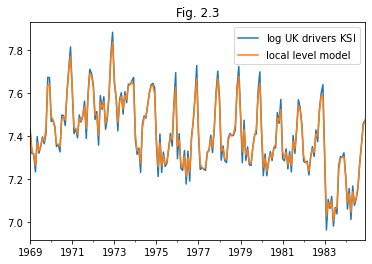

In [28]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='local level model')
ax.set_title('Fig. 2.3')
ax.legend()

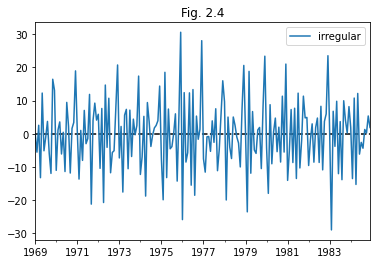

In [29]:
ax = pd.Series(llevel_results.smoothing_error[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.4')
ax.legend()

In [30]:
pd.DataFrame(diagnostic_tests(llevel_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),105.385232,24.995790,False
1,Independence,ACF(lag=1): r(1),0.008586,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.537384,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(64),1.064007,1.639485,True
4,Normality,Jarque-Bera: N,13.242151,5.991465,False


In [31]:
# AIC
llevel_results.aic / llevel_results.nobs

-1.249569693038076

## Local Level Model and Fatalties in Norway

- A better example of local level model

In [32]:
llevel_model_norway = sm.tsa.UnobservedComponents(df_fatalties['log_Norwegian_fatalties'], level='local level', use_exact_diffuse=True)

In [33]:
llevel_results_norway = llevel_model_norway.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.819835
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15


In [34]:
llevel_results_norway.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                           
===================================================================================
Dep. Variable:     log_Norwegian_fatalties   No. Observations:                   34
Model:                         local level   Log Likelihood                  27.874
Date:                     Thu, 18 Feb 2021   AIC                            -49.749
Time:                             09:25:09   BIC                            -45.170
Sample:                         12-31-1970   HQIC                           -48.187
                              - 12-31-2003                                         
Covariance Type:                       opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0033      0.002      1.533      0.125      -0.001       0.007
sigma2.level         0.0047      0.003      1.638      0.101      -0.001       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.44   Prob(JB):                         0.55
Heteroskedasticity (H):               1.75   Skew:                             0.30
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

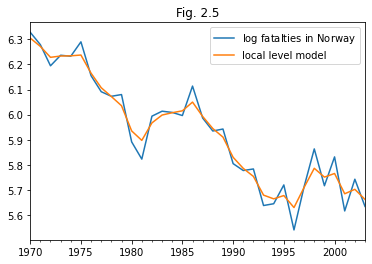

In [35]:
ax = df_fatalties['log_Norwegian_fatalties'].plot(label='$\log$ fatalties in Norway')
ax = pd.Series(llevel_results_norway.level['smoothed'], index=df_fatalties.index).plot(ax=ax, label='local level model')
ax.set_title('Fig. 2.5')
ax.legend()

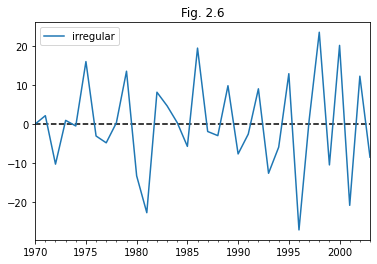

In [36]:
ax = pd.Series(llevel_results_norway.smoothing_error[0], index=df_fatalties.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.6')
ax.legend()

In [37]:
pd.DataFrame(diagnostic_tests(llevel_results_norway, lag_boxljung=10, nlags=[1, 4]))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(10),6.227593,18.307038,True
1,Independence,ACF(lag=1): r(1),-0.128843,"[-0.33613105027889334, 0.33613105027889334]",True
2,Independence,ACF(lag=4): r(4),-0.102481,"[-0.33613105027889334, 0.33613105027889334]",True
3,Heterokedasticity,H(11),1.746441,3.473699,True
4,Normality,Jarque-Bera: N,1.190712,5.991465,True


In [38]:
# AIC
llevel_results_norway.aic / llevel_results_norway.nobs

-1.463198654856063

# Chapter 3: Local Linear Trend Model

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

## Deterministic Level and Deterministic Trend
$$
\begin{aligned}
\end{aligned}
\begin{aligned}
\xi_t &= 0, \, \zeta_t = 0\\
y_t &= \mu_1 + v_1(t-1) + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\end{aligned}
$$

... Same as linear regression in Chapter 1

In [39]:
dtrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='deterministic trend', use_exact_diffuse=True)

In [40]:
dtrend_results = dtrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.404501
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


In [41]:
dtrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Unobserved Components Results                         
===============================================================================
Dep. Variable:             log_drivers   No. Observations:                  192
Model:             deterministic trend   Log Likelihood                  77.664
Date:                 Thu, 18 Feb 2021   AIC                           -149.328
Time:                         09:25:09   BIC                           -139.556
Sample:                     01-31-1969   HQIC                          -145.370
                          - 12-31-1984                                         
Covariance Type:                   opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0230      0.003      8.825      0.000       0.018       0.028
===================================================================================
Ljung-Box (L1) (Q):                  71.71   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               1.36   Skew:                             0.23
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

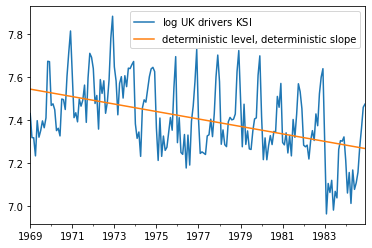

In [42]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dtrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level, deterministic slope')
ax.legend()

In [43]:
pd.DataFrame(diagnostic_tests(dtrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),305.681762,23.684791,False
1,Independence,ACF(lag=1): r(1),0.610367,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.629976,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.359898,1.646022,True
4,Normality,Jarque-Bera: N,1.789846,5.991465,True


In [44]:
# AIC
dtrend_results.aic / dtrend_results.nobs

-0.7777511310056114

## Stochastic Level and Stochastic Slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

In [45]:
lltrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local linear trend', use_exact_diffuse=True)

In [46]:
lltrend_results = lltrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.615221
         Iterations: 20
         Function evaluations: 31
         Gradient evaluations: 31


In [47]:
lltrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:             local linear trend   Log Likelihood                 118.122
Date:                Thu, 18 Feb 2021   AIC                           -226.245
Time:                        09:25:09   BIC                           -209.957
Sample:                    01-31-1969   HQIC                          -219.648
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0021      0.001      1.773      0.076      -0.000       0.004
sigma2.level         0.0121      0.002      5.064      0.000       0.007       0.017
sigma2.trend      8.009e-21   1.93e-05   4.16e-16      1.000   -3.77e-05    3.77e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.68
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

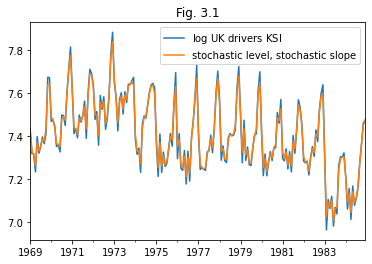

In [48]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(lltrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level, stochastic slope')
ax.set_title('Fig. 3.1')
ax.legend()

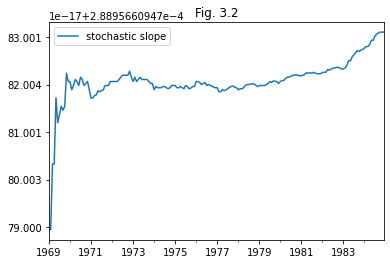

In [49]:
ax = pd.Series(lltrend_results.trend['smoothed'], index=df_ukdrivers.index).plot(label='stochastic slope')
ax.set_title('Fig. 3.2')
ax.legend()

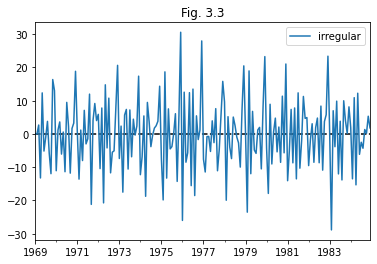

In [50]:
ax = pd.Series(lltrend_results.smoothing_error[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.3')
ax.legend()

In [51]:
pd.DataFrame(diagnostic_tests(lltrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),100.609514,23.684791,False
1,Independence,ACF(lag=1): r(1),0.004765,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.532371,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.057827,1.646022,True
4,Normality,Jarque-Bera: N,14.945524,5.991465,False


In [52]:
# AIC
lltrend_results.aic / lltrend_results.nobs

-1.178359158872038

## Stochastic Level and Deterministic Slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_1 + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

In [53]:
lldtrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local linear deterministic trend', use_exact_diffuse=True)

In [54]:
lldtrend_results = lldtrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.615221
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17


In [55]:
lldtrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Unobserved Components Results                                
============================================================================================
Dep. Variable:                          log_drivers   No. Observations:                  192
Model:             local linear deterministic trend   Log Likelihood                 118.122
Date:                              Thu, 18 Feb 2021   AIC                           -228.245
Time:                                      09:25:10   BIC                           -215.215
Sample:                                  01-31-1969   HQIC                          -222.968
                                       - 12-31-1984                                         
Covariance Type:                                opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0021      0.001      2.044      0.041    8.67e-05       0.004
sigma2.level         0.0121      0.002      5.900      0.000       0.008       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.68
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

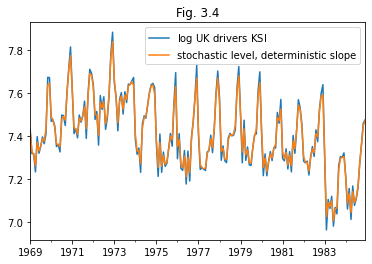

In [56]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(lldtrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level, deterministic slope')
ax.set_title('Fig. 3.4')
ax.legend()

In [57]:
pd.DataFrame(diagnostic_tests(lldtrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),100.609505,23.684791,False
1,Independence,ACF(lag=1): r(1),0.004765,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.532371,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.057827,1.646022,True
4,Normality,Jarque-Bera: N,14.945524,5.991465,False


In [58]:
# AIC
## slightly better than lltrend model
lldtrend_results.aic / lldtrend_results.nobs

-1.1887758255387018

## Local Linear Trend Model and Fatalties in Finland

- A better example of local linear trend model

In [59]:
lltrend_model_finland = sm.tsa.UnobservedComponents(df_fatalties['log_Finnish_fatalties'], level='local linear trend', use_exact_diffuse=True)

In [60]:
lltrend_results_finland = lltrend_model_finland.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.732419
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27


In [61]:
lltrend_results_finland.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                          
=================================================================================
Dep. Variable:     log_Finnish_fatalties   No. Observations:                   34
Model:                local linear trend   Log Likelihood                  24.902
Date:                   Thu, 18 Feb 2021   AIC                            -39.805
Time:                           09:25:10   BIC                            -32.173
Sample:                       12-31-1970   HQIC                           -37.202
                            - 12-31-2003                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0032      0.003      0.984      0.325      -0.003       0.010
sigma2.level      9.821e-15      0.006   1.53e-12      1.000      -0.013       0.013
sigma2.trend         0.0015      0.001      1.094      0.274      -0.001       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.87   Prob(JB):                         0.72
Heteroskedasticity (H):               0.74   Skew:                            -0.22
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

... Because the variance of the stochastic level (`sigma2.level`) is close to 0, consider deterministic level and stochastic slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

In [62]:
strend_model_finland = sm.tsa.UnobservedComponents(df_fatalties['log_Finnish_fatalties'], level='smooth trend', use_exact_diffuse=True)

In [63]:
strend_results_finland = strend_model_finland.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.732419
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16


In [64]:
strend_results_finland.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                          
=================================================================================
Dep. Variable:     log_Finnish_fatalties   No. Observations:                   34
Model:                      smooth trend   Log Likelihood                  24.902
Date:                   Thu, 18 Feb 2021   AIC                            -41.805
Time:                           09:25:10   BIC                            -35.699
Sample:                       12-31-1970   HQIC                           -39.722
                            - 12-31-2003                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0032      0.001      2.365      0.018       0.001       0.006
sigma2.trend         0.0015      0.001      1.688      0.091      -0.000       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.87   Prob(JB):                         0.72
Heteroskedasticity (H):               0.74   Skew:                            -0.22
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

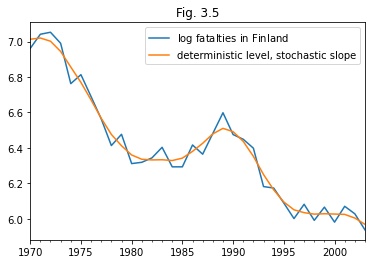

In [65]:
ax = df_fatalties['log_Finnish_fatalties'].plot(label='$\log$ fatalties in Finland')
ax = pd.Series(strend_results_finland.level['smoothed'], index=df_fatalties.index).plot(ax=ax, label='deterministic level, stochastic slope')
ax.set_title('Fig. 3.5')
ax.legend()

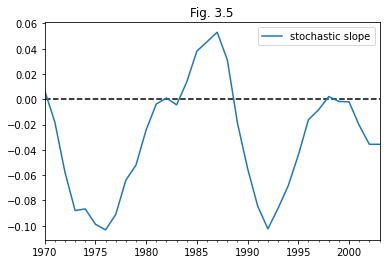

In [66]:
ax = pd.Series(strend_results_finland.trend['smoothed'], index=df_fatalties.index).plot(label='stochastic slope')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.5')
ax.legend()

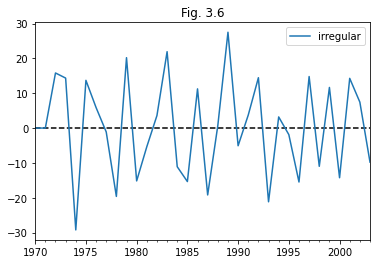

In [67]:
ax = pd.Series(strend_results_finland.smoothing_error[0], index=df_fatalties.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.6')
ax.legend()

In [68]:
# TODO:
# change heterokedasticity statistics from H to 1/H when H<1
pd.DataFrame(diagnostic_tests(strend_results_finland, lag_boxljung=10, nlags=[1, 4]))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(10),7.043655,16.918978,True
1,Independence,ACF(lag=1): r(1),-0.029300,"[-0.33613105027889334, 0.33613105027889334]",True
2,Independence,ACF(lag=4): r(4),-0.097354,"[-0.33613105027889334, 0.33613105027889334]",True
3,Heterokedasticity,H(11),0.741900,3.473699,True
4,Normality,Jarque-Bera: N,0.644021,5.991465,True


In [69]:
# AIC
strend_results_finland.aic / strend_results_finland.nobs

-1.229544609853073

# Chapter 4: Local Level Model with Seasonality

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\gamma_{t+1} &= - \gamma_t  - \gamma_{t-1} - \gamma_{t-2} + \omega_t, \quad \omega_t \sim N(0, \sigma_\omega^2)\\
\end{aligned}
$$

## Deterministic Level and Deterministic Seasonality





$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\gamma_{t+1} &= - \gamma_t  - \gamma_{t-1} - \gamma_{t-2}
\end{aligned}
$$

In [70]:
dconst_seasonal_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='deterministic constant', seasonal=12, use_exact_diffuse=True)

In [71]:
dconst_seasonal_results = dconst_seasonal_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.406714
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17


In [72]:
dconst_seasonal_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                   log_drivers   No. Observations:                  192
Model:                deterministic constant   Log Likelihood                  78.089
                   + stochastic seasonal(12)   AIC                           -128.178
Date:                       Thu, 18 Feb 2021   BIC                            -82.573
Time:                               09:25:11   HQIC                          -109.708
Sample:                           01-31-1969                                         
                                - 12-31-1984                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0176      0.002      9.452      0.000       0.014       0.021
sigma2.seasonal   5.569e-19      0.000   2.92e-15      1.000      -0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  95.99   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               3.40   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

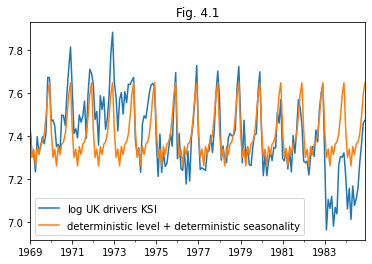

In [73]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_seasonal_results.level['smoothed'] + dconst_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level + deterministic seasonality')
ax.set_title('Fig. 4.1')
ax.legend()

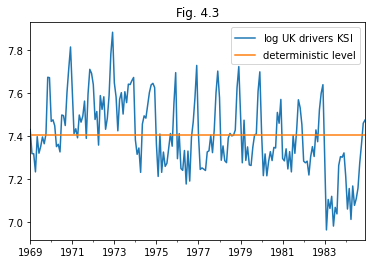

In [74]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_seasonal_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level')
ax.set_title('Fig. 4.3')
ax.legend()

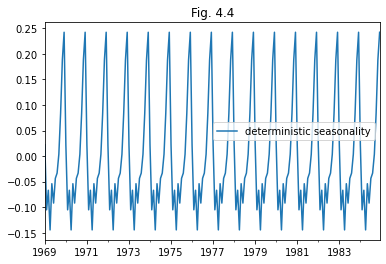

In [75]:
ax = pd.Series(dconst_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(label='deterministic seasonality')
ax.set_title('Fig. 4.4')
ax.legend()

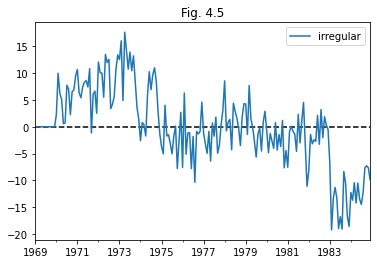

In [76]:
ax = pd.Series(dconst_seasonal_results.smoothing_error[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 4.5')
ax.legend()

In [77]:
pd.DataFrame(diagnostic_tests(dconst_seasonal_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),751.575495,9.487729,False
1,Independence,ACF(lag=1): r(1),0.728910,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.456047,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(60),3.399617,1.666791,False
4,Normality,Jarque-Bera: N,1.971357,5.991465,True


In [78]:
# AIC
dconst_seasonal_results.aic / dconst_seasonal_results.nobs

-0.6675947252280136